In [1]:
import pandas as pd
import numpy as np

In [2]:
path="/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/HR_comma_sep.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
## 70 columns
# How do I figure out which column?
# If a given predictor is related to the target variable?
data['left'].unique()

array([1, 0])

In [9]:
## If the satisfaction level has any impact on people leaving?
import matplotlib.pyplot as plt
%matplotlib inline

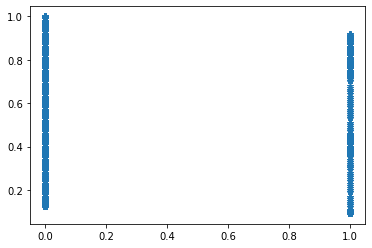

In [10]:
plt.plot(data['left'],data['satisfaction_level'],"*")

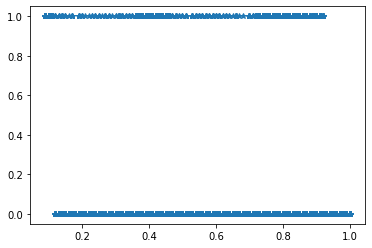

In [11]:
plt.plot(data['satisfaction_level'],data['left'],"*")

In [12]:
data.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [13]:
### Maybe satisfaction level can be a predictor? (Classical Linear or Logistic)

In [14]:
data.groupby('left')['last_evaluation'].mean()

left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

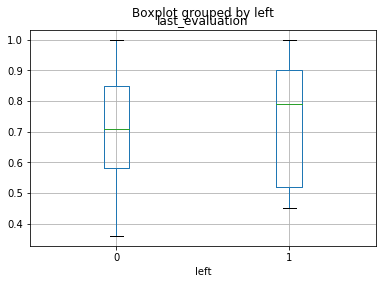

In [15]:
### Should be expecting this to be a predictor? [70 columns]
# boxplot?
data.boxplot(column='last_evaluation',by='left')

In [16]:
### Relationship between last evaluation and left (Strong/Weak)
## Lean towards including it in the model and checking
data['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [19]:
## Should I treat as cont or a categorical predictor
# How should I reason about checking its relationship with left?
#data[['left','number_project']]

In [20]:
data.groupby(['left','number_project']).agg({'number_project':'count'})

number_project
left number_project                
0    2                          821
     3                         3983
     4                         3956
     5                         2149
     6                          519
1    2                         1567
     3                           72
     4                          409
     5                          612
     6                          655
     7                          256

In [21]:
## Can I say that number of projects and left are related?
# Yes
# No
## 2 and 7 project group behaves similarly?
## 2,7, 3 to 6 is may be one  group
## 3 groups or 2 groups
data['num_pro_1']=data['number_project'].map(lambda x: 1 if x==2 or x==7 else 0)

In [22]:
data['num_pro_7']=data['number_project'].map(lambda x:1 if x==7 else 0)
data['num_pro_2']=data['number_project'].map(lambda x:1 if x==2 else 0)
data['num_pro_3_6']=data['number_project'].map(lambda x:1 if x<=6 and x>=3 else 0)

In [24]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,num_pro_1,num_pro_7,num_pro_2,num_pro_3_6
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,1


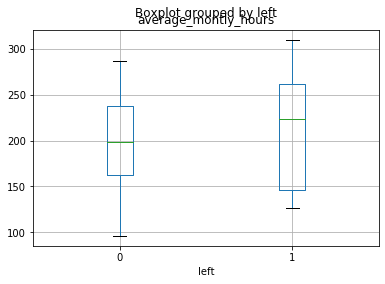

In [26]:
data.boxplot(column='average_montly_hours',by='left')

In [27]:
## Leave it

In [28]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [30]:
### How to check the relationship?
data.groupby(['left','time_spend_company']).agg({'time_spend_company':'count'})

time_spend_company
left time_spend_company                    
0    2                                 3191
     3                                 4857
     4                                 1667
     5                                  640
     6                                  509
     7                                  188
     8                                  162
     10                                 214
1    2                                   53
     3                                 1586
     4                                  890
     5                                  833
     6                                  209

In [31]:
## Can I put this variable as a numerical variable also?
data['Work_accident'].unique()

array([0, 1])

In [32]:
data.groupby(['left','Work_accident']).agg({'Work_accident':'count'})

Work_accident
left Work_accident               
0    0                       9428
     1                       2000
1    0                       3402
     1                        169

In [33]:
3402/(9428+3402)

0.2651597817614965

In [34]:
169/(2000+169)

0.07791609036422315

In [35]:
data['promotion_last_5years'].unique()

array([0, 1])

In [37]:
data.groupby(['left','promotion_last_5years']).agg({'promotion_last_5years':'count'})

promotion_last_5years
left promotion_last_5years                       
0    0                                      11128
     1                                        300
1    0                                       3552
     1                                         19

In [38]:
data.groupby(['left','salary']).agg({'salary':'count'})

salary
left salary        
0    high      1155
     low       5144
     medium    5129
1    high        82
     low       2172
     medium    1317

In [39]:
data.groupby(['left','sales']).agg({'sales':'count'})

sales
left sales             
0    IT             954
     RandD          666
     accounting     563
     hr             524
     management     539
     marketing      655
     product_mng    704
     sales         3126
     support       1674
     technical     2023
1    IT             273
     RandD          121
     accounting     204
     hr             215
     management      91
     marketing      203
     product_mng    198
     sales         1014
     support        555
     technical      697

In [ ]:
### Keep this.

In [40]:
train=data.sample(frac=0.70,random_state=200)
test=data.drop(train.index,axis=0)

In [41]:
### Build the model
formula='''left~satisfaction_level+last_evaluation+num_pro_1+time_spend_company+
salary+sales'''

In [42]:
import statsmodels.formula.api as smf

In [44]:
import statsmodels.api as sm

In [45]:
mod1=smf.glm(formula,family=sm.families.Binomial(),data=train).fit()

In [46]:
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10483
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3700.1
Date:                Mon, 22 Jul 2019   Deviance:                       7400.1
Time:                        11:20:44   Pearson chi2:                 9.19e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.5592      0.283    -23.170      0.000      -7.114      -6.004
salary[T.low]         

In [48]:
### Manually create dummies
train['sales_RandD']=train['sales'].map(lambda x: 1 if x=='RandD'else 0)
test['sales_RandD']=test['sales'].map(lambda x: 1 if x=='RandD' else 0)

In [49]:
train['sales_hr']=train['sales'].map(lambda x: 1 if x=='hr'else 0)
test['sales_hr']=test['sales'].map(lambda x: 1 if x=='hr' else 0)

In [50]:
train['sales_management']=train['sales'].map(lambda x: 1 if x=='management'else 0)
test['sales_management']=test['sales'].map(lambda x: 1 if x=='management' else 0)

In [51]:
train['sales_technical']=train['sales'].map(lambda x: 1 if x=='technical'else 0)
test['sales_technical']=test['sales'].map(lambda x: 1 if x=='technical' else 0)

In [52]:
formula='''left~satisfaction_level+last_evaluation+num_pro_1+time_spend_company+
salary+sales_RandD+sales_hr+sales_management+sales_technical'''

In [53]:
mod2=smf.glm(formula,family=sm.families.Binomial(),data=train).fit()

In [55]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10488
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3703.7
Date:                Mon, 22 Jul 2019   Deviance:                       7407.5
Time:                        11:27:08   Pearson chi2:                 9.19e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.4889      0.266    -24.436      0.000      -7.009      -5.968
salary[T.low]          2.090

In [56]:
### AUC?
pred_prob=mod2.predict(train)

In [58]:
import sklearn.metrics as metrics

In [59]:
metrics.roc_auc_score(train['left'],pred_prob)

0.8962652087464142

In [60]:
pred_probs_test=mod2.predict(test)

In [63]:
metrics.roc_auc_score(test['left'],pred_probs_test)

0.8849817438899747

In [64]:
### Give good results outside of the training sample

In [65]:
### Multicollinearity====> VIF

In [66]:
import patsy

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
y,X=patsy.dmatrices(formula,data=train,return_type='dataframe')

In [73]:
X.head()

,Intercept,salary[T.low],salary[T.medium],satisfaction_level,last_evaluation,num_pro_1,time_spend_company,sales_RandD,sales_hr,sales_management,sales_technical
11291,1.0,0.0,1.0,0.62,0.91,0.0,10.0,0.0,0.0,0.0,0.0
6315,1.0,1.0,0.0,0.76,0.65,0.0,3.0,0.0,0.0,0.0,1.0
9333,1.0,1.0,0.0,1.00,0.85,0.0,3.0,0.0,0.0,0.0,0.0
5519,1.0,0.0,0.0,0.98,0.57,0.0,3.0,0.0,0.0,0.0,0.0
7816,1.0,1.0,0.0,0.30,0.88,0.0,4.0,0.0,1.0,0.0,0.0


In [75]:
variance_inflation_factor(X.values,0)

47.03628421763947

In [76]:
variance_inflation_factor(X.values,1)

3.6997160072354105

In [77]:
variance_inflation_factor(X.values,2)

3.665593738320502

In [78]:
variance_inflation_factor(X.values,3)

1.1371169561769883

In [80]:
[variance_inflation_factor(X.values,i) for i in range(0,X.shape[1])]

[47.03628421763947,
 3.6997160072354105,
 3.665593738320502,
 1.1371169561769883,
 1.1352461386175314,
 1.2457290728130486,
 1.0557097097075734,
 1.0224458593502732,
 1.0205594269564504,
 1.073625949073318,
 1.0381758896850037]

In [ ]:
### Multicollinearity?